In [2]:
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import optimizers
from keras import backend as K
import matplotlib.pyplot as plt


In [3]:
train_datagen = ImageDataGenerator(rescale=1/255., horizontal_flip=True,vertical_flip=True, rotation_range=0.4, zoom_range=0.4)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/chest_Xray/train/', target_size=(224, 224), batch_size=8, class_mode='binary')
val_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/chest_Xray/val', target_size=(224, 224), batch_size=8, shuffle=True, class_mode='binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/chest_Xray/test',target_size=(224, 224), batch_size=8, class_mode='binary')
RLR = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=3,cooldown=3,min_lr=0.01, verbose=1)
callbacks = [RLR]

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid',
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
print(model.summary())

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(training_set,
                    steps_per_epoch=5216//8,
                    epochs=12,
                    validation_data=test_set,
                    validation_steps=624//8,
                    callbacks=callbacks)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

2/2 [==============================] - 0s 148ms/step - loss: 0.9727 - accuracy: 0.7500

accuracy: 75%


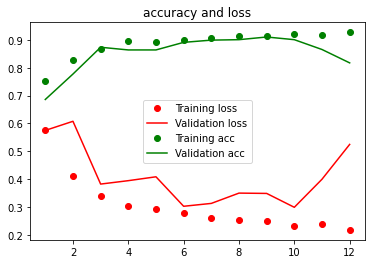

In [20]:
ev = model.evaluate(val_set)
print("\n%s: %.f%%" % (model.metrics_names[1], ev[1]*100))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.title("accuracy and loss")
plt.plot(epochs, loss, 'bo', label='Training loss',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='red')
plt.plot(epochs, acc, 'bo', label='Training acc',color='green')
plt.plot(epochs, val_acc, 'b', label='Validation acc',color='green')
plt.legend()